In [2]:
import pandas as pd

# Try reading with ISO-8859-1 encoding (Latin-1)
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

# Preview the data
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Convert dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True)

# Add profit margin column
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Check result
df[['Sales', 'Profit', 'Profit_Margin']].head()

,Sales,Profit,Profit_Margin
0,261.9600,41.9136,0.1600
1,731.9400,219.5820,0.3000
2,14.6200,6.8714,0.4700
3,957.5775,-383.0310,-0.4000
4,22.3680,2.5164,0.1125


In [4]:
profit_summary = df.groupby(['Category', 'Sub_Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

profit_summary['Profit_Margin'] = profit_summary['Profit'] / profit_summary['Sales']

# Show from lowest to highest profit margin
profit_summary.sort_values(by='Profit_Margin')

,Category,Sub_Category,Sales,Profit,Profit_Margin
3,Furniture,Tables,206965.5320,-17725.4811,-0.085645
0,Furniture,Bookcases,114879.9963,-3472.5560,-0.030228
12,Office Supplies,Supplies,46673.5380,-1189.0995,-0.025477
15,Technology,Machines,189238.6310,3384.7569,0.017886
1,Furniture,Chairs,328449.1030,26590.1663,0.080957
11,Office Supplies,Storage,223843.6080,21278.8264,0.095061
16,Technology,Phones,330007.0540,44515.7306,0.134893
2,Furniture,Furnishings,91705.1640,13059.1436,0.142404
6,Office Supplies,Binders,203412.7330,30221.7633,0.148574
4,Office Supplies,Appliances,107532.1610,18138.0054,0.168675


In [5]:
slow_movers = df.groupby('Product_Name').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).sort_values('Sales').head(10)

slow_movers

,Sales,Quantity,Profit
Product_Name,,,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624,2,-4.4660
Avery 5,5.760,2,2.8224
Xerox 20,6.480,1,3.1104
Grip Seal Envelopes,7.072,2,2.3868
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700,2,3.1570
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",7.800,4,3.0420
Xerox 1989,7.968,2,2.6892
4009 Highlighters,8.040,6,2.7336
Stockwell Gold Paper Clips,8.096,5,3.4040


In [6]:
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()
monthly_sales

,Year,Month,Sales,Profit
0,2011,1,13946.2290,2446.7711
1,2011,2,4810.5580,865.7280
2,2011,3,55691.0090,498.7299
3,2011,4,28295.3450,3488.8352
4,2011,5,23648.2870,2738.7096
5,2011,6,34595.1276,4976.5244
6,2011,7,33946.3930,-841.4826
7,2011,8,27909.4685,5318.1050
8,2011,9,81777.3508,8328.0994
9,2011,10,31453.3930,3448.2573


In [7]:
df.to_csv('Cleaned_Superstore.csv', index=False)

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Cleaned_Superstore.csv")

# Simulate Inventory_Days (if not in dataset)
import numpy as np
df["Inventory_Days"] = np.random.randint(10, 90, size=len(df))  # random example values

# Calculate correlation with Profit
correlation = df[['Inventory_Days', 'Profit']].corr()
print("Correlation between Inventory Days and Profit:")
print(correlation)

Correlation between Inventory Days and Profit:
                Inventory_Days    Profit
Inventory_Days        1.000000  0.001687
Profit                0.001687  1.000000


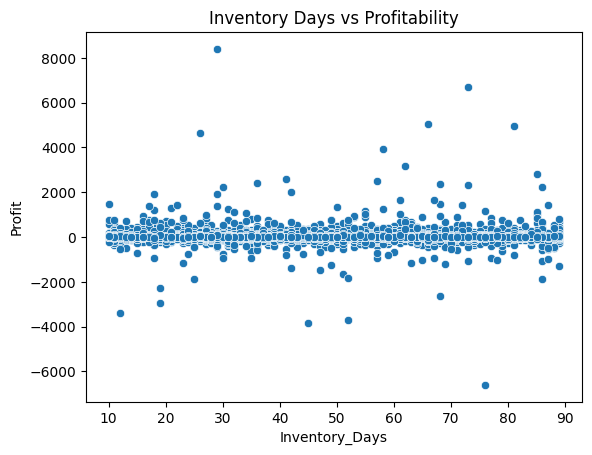

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Inventory_Days', y='Profit', data=df)
plt.title("Inventory Days vs Profitability")
plt.show()

In [3]:
import pandas as pd
import numpy as np

# Step 1: Load your existing cleaned CSV
df = pd.read_csv("Cleaned_Superstore.csv")  # Change if your file name is different

# Step 2: Create a new column 'Inventory_Days' with random values between 15 and 90
df["Inventory_Days"] = np.random.randint(15, 91, size=len(df))

# Step 3: Save the new CSV with this column added
df.to_csv("Superstore_with_Inventory.csv", index=False)

print("✅ Inventory_Days column added and file saved as 'Superstore_with_Inventory.csv'")

✅ Inventory_Days column added and file saved as 'Superstore_with_Inventory.csv'
